In [1]:
import neuron
from neuron import h
import matplotlib.pyplot as plt
from neuron.units import ms, mV
import numpy as np
pth_mod = '/Users/katharinaduecker/Documents/projects_brown/hnn_dev/mod'

from cell_builder_utils import cell_params, _get_dends, _get_pyr_soma, Cell
neuron.load_mechanisms(pth_mod)

True

In [6]:
# get paramaters
section_params, end_pts, cell_tree = cell_params()

# build sections
section_names = list(end_pts.keys())

sections = _get_dends(section_params, 'L5Pyr', section_names)
sections['soma'] = _get_pyr_soma(section_params, 'L5Pyr')



In [25]:
# add mechanisms from Rich 2021: leak (pas), SK (K), Na 

def add_mechs(cell, nap=True):
    for sec_name, section in cell.sections.items():
        cell._nrn_sections[sec_name].insert('pas')
        cell._nrn_sections[sec_name].insert('SKv3_1')

        if nap:
            cell._nrn_sections[sec_name].insert('Nap_Et2')
        if sec_name == 'soma':
            cell._nrn_sections[sec_name].insert('NaTs2_t')
        else:
            cell._nrn_sections[sec_name].insert('NaTa_t')

        for seg in cell._nrn_sections[sec_name]:
            seg.pas.e = -84.4
            seg.pas.g = 1.75e-5
            seg.SKv3_1.gSKv3_1bar = 0.04
            if nap:
                seg.Nap_Et2.gNap_Et2bar = 10e-5
            if sec_name == 'soma':
                seg.NaTs2_t.gNaTs2_tbar = 2.1
            else:
                seg.NaTa_t.gNaTa_tbar = 0.001

    return cell



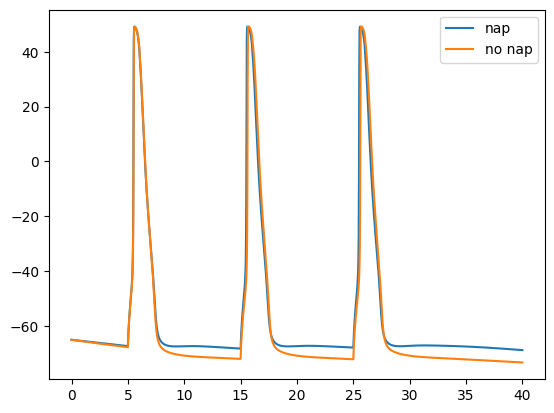

In [26]:
# make it spike at 100 Hz


# build L5 cell with nap
l5pyr= Cell(sections, cell_tree, gid=0)
l5pyr.build()
l5pyr = add_mechs(l5pyr, nap=True)

stim = [None]*3

for i in range(3):
    stim[i] = h.IClamp(l5pyr._nrn_sections['soma'](0.5))
    stim[i].delay = 5+(10*i)
    stim[i].dur = 1
    stim[i].amp = 5.

soma_v = h.Vector().record(l5pyr._nrn_sections['soma'](0.5)._ref_v)
t = h.Vector().record(h._ref_t)

h.load_file("stdrun.hoc")

h.celsius = 37
h.finitialize(-65 * mV)
h.continuerun(40 * ms)

plt.plot(t,soma_v, label='nap')


# build L5 cell
l5pyr= Cell(sections, cell_tree, gid=0)
l5pyr.build()
l5pyr = add_mechs(l5pyr, nap=False)

stim = [None]*3

for i in range(3):
    stim[i] = h.IClamp(l5pyr._nrn_sections['soma'](0.5))
    stim[i].delay = 5+(10*i)
    stim[i].dur = 1
    stim[i].amp = 5.

soma_v = h.Vector().record(l5pyr._nrn_sections['soma'](0.5)._ref_v)
t = h.Vector().record(h._ref_t)

h.celsius = 37
h.finitialize(-65 * mV)
h.continuerun(40 * ms)

plt.plot(t,soma_v, label='no nap')

plt.legend()


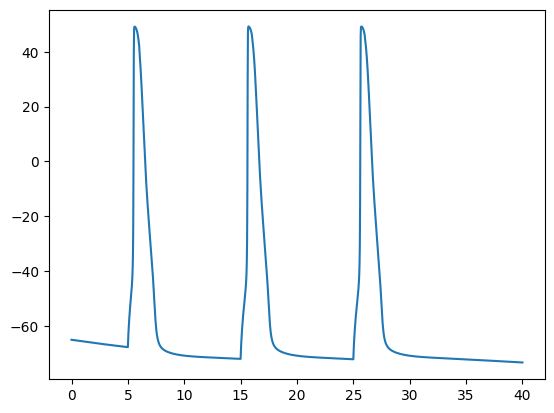

In [12]:
# build L5 cell with nap
l5pyr= Cell(sections, cell_tree, gid=0)
l5pyr.build()
l5pyr = add_mechs(l5pyr, nap=True)

stim = [None]*3

for i in range(3):
    stim[i] = h.IClamp(l5pyr._nrn_sections['soma'](0.5))
    stim[i].delay = 5+(10*i)
    stim[i].dur = 1
    stim[i].amp = 5.

soma_v = h.Vector().record(l5pyr._nrn_sections['soma'](0.5)._ref_v)
t = h.Vector().record(h._ref_t)

h.load_file("stdrun.hoc")

h.celsius = 37
h.finitialize(-65 * mV)
h.continuerun(40 * ms)

plt.plot(t,soma_v)